In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, PatchTST
from neuralforecast.utils import AirPassengersDF

### Raw Data

In [17]:
Y_df = pd.read_csv("F:/Pandemic-Database/Covid 19/Covid_MA_Confirmed_Value_Only.csv")
Y_df['unique_id'] = 1. # We can add an integer as identifier
Y_df = Y_df.rename(columns={'Date': 'ds', 'Case Number': 'y'})
Y_df = Y_df[['unique_id', 'ds', 'y']]
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

train_size = int(0.8 * len(Y_df))

Global seed set to 1


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

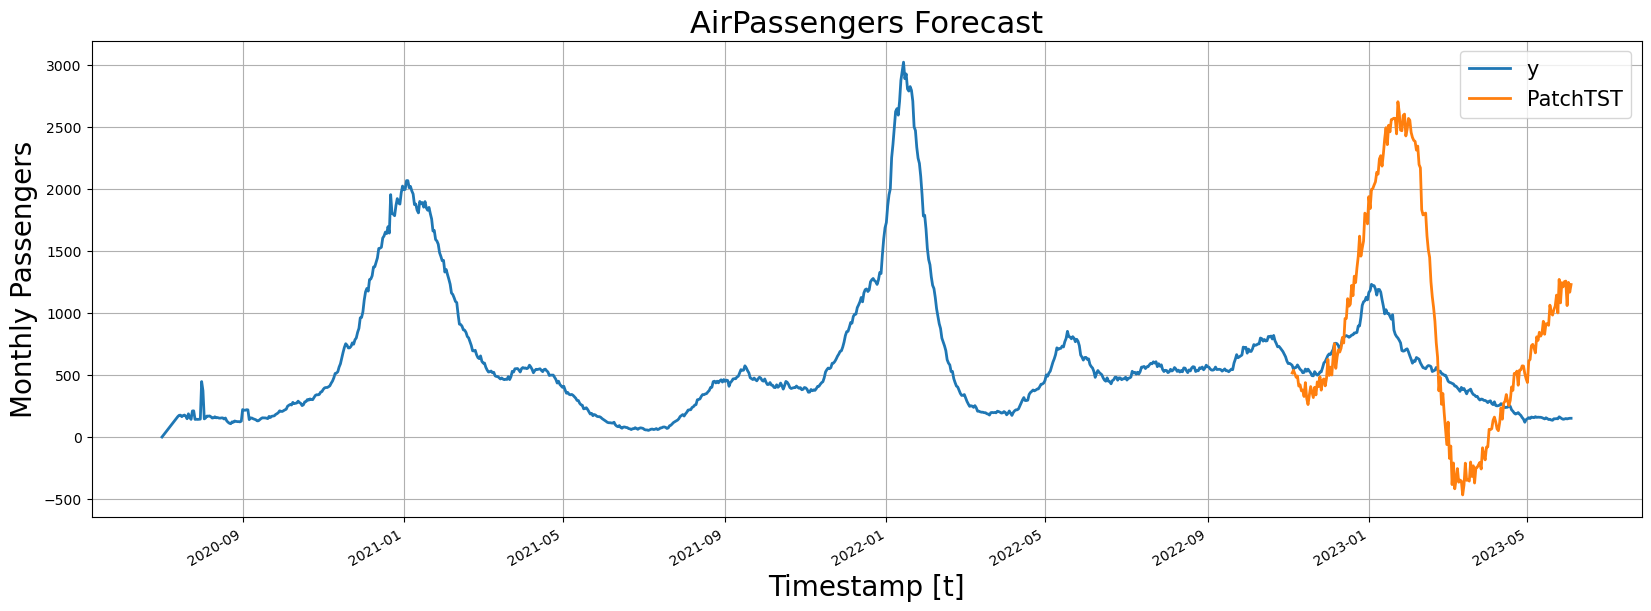

In [11]:
Y_train_df = Y_df.iloc[:train_size] # 132 train
Y_test_df = Y_df.iloc[train_size:] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [PatchTST(input_size=2 * horizon, h=horizon, max_steps=100)]
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()

# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'PatchTST']].plot(ax=ax, linewidth=2)

ax.set_title('PatchTST Prediction for Covid-19 Data', fontsize=22)
ax.set_ylabel('Confirmed Cases', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [12]:
Y_hat_df

,unique_id,ds,y,PatchTST
0,1.0,2022-11-04,578.0,516.737061
1,1.0,2022-11-05,546.0,538.423462
2,1.0,2022-11-06,559.0,510.264465
3,1.0,2022-11-07,561.0,481.747253
4,1.0,2022-11-08,581.0,491.863800
...,...,...,...,...
207,1.0,2023-05-30,149.0,1256.970459
208,1.0,2023-05-31,146.0,1059.353760
209,1.0,2023-06-01,149.0,1246.453369
210,1.0,2023-06-02,151.0,1167.592773


In [15]:
sum = 0

for i in range(len(Y_hat_df)):
    sum += abs(Y_hat_df['PatchTST'][i] - Y_hat_df['y'][i])

MAE = sum/len(Y_hat_df)

print(MAE)

638.570269314748


### Log Transformed Data

In [20]:
Y_log_df = Y_df.copy()
Y_log_df['y'] = np.log(Y_log_df['y'] + 1)
Y_log_df

,unique_id,ds,y
0,1.0,2020-07-02,0.000000
1,1.0,2020-07-14,5.111988
2,1.0,2020-07-15,5.170484
3,1.0,2020-07-16,5.176150
4,1.0,2020-07-17,5.105945
...,...,...,...
1051,1.0,2023-05-30,5.010635
1052,1.0,2023-05-31,4.990433
1053,1.0,2023-06-01,5.010635
1054,1.0,2023-06-02,5.023881


Global seed set to 1


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

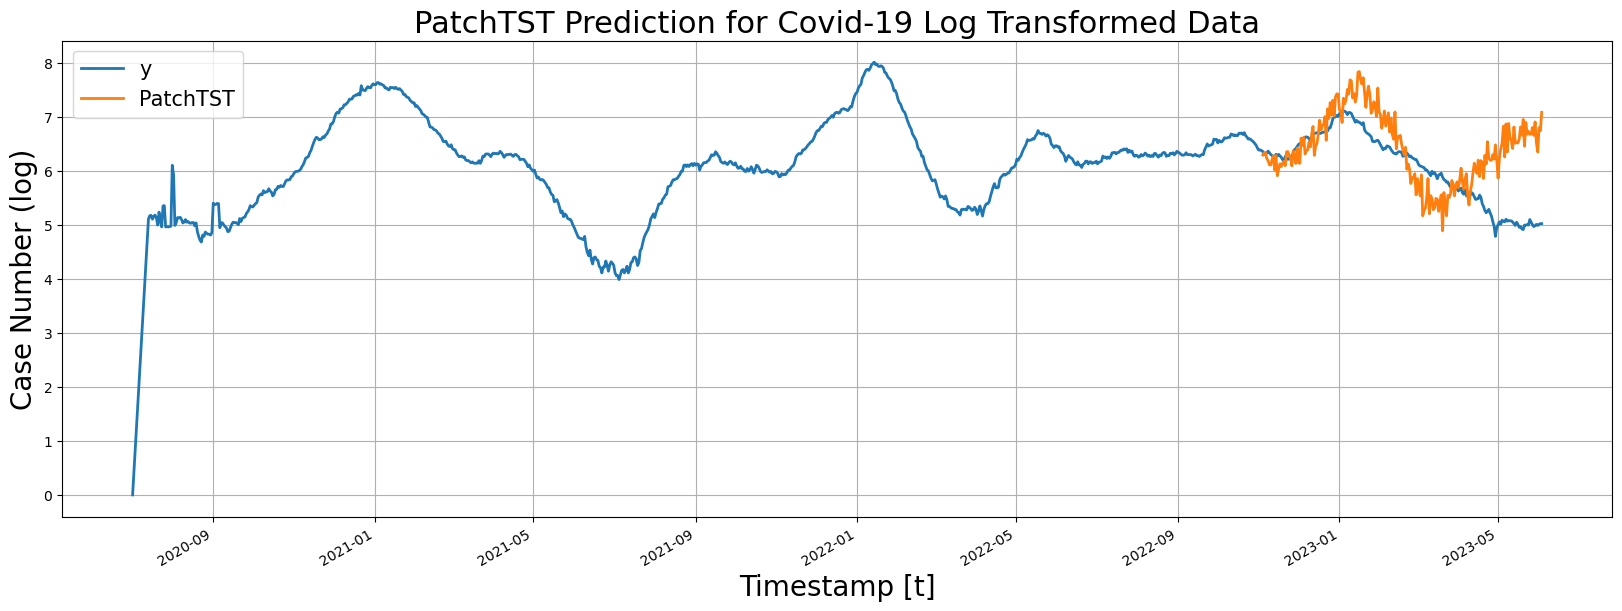

In [21]:
Y_train_df = Y_log_df.iloc[:train_size] # 132 train
Y_test_df = Y_log_df.iloc[train_size:] # 12 test

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [PatchTST(input_size=2 * horizon, h=horizon, max_steps=100)]
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()

# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'PatchTST']].plot(ax=ax, linewidth=2)

ax.set_title('PatchTST Prediction for Covid-19 Log Transformed Data', fontsize=22)
ax.set_ylabel('Case Number (log)', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()